This report conducts an exploratory data analysis on the US uninsured population (under 65 years).  The 3 data sets (2010, 2013 and 2016) are retrieved from the US Census Bureau (See [readme.txt](https://github.com/bsuzow/USUninsured/blob/master/readme.txt) for the source URLs).

Since the ACA was signed into law in 2010 by President Obama, its major provisions had taken into effect by 2014. Has the number of the uninsured decreased?  Wikeppedia reports "the uninsured share of population had roughtly halved."  From the 3 annual data sets, we can compare the percentage changes in the uninsured before and after the ACA. 
- With the 2010 and 2013 datasets, we calculate the percentage changes between the two years.  This serves as the 'before-the-ACA' data points.
- With the 2013 and 2016 datasets, the 'after-the-ACA' data points get generated.


In [4]:
%matplotlib inline
import pandas as pd

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

from US_States import GetStateCodes

#-----------------------------------
# Read the sheets of the xls file.
#-----------------------------------

fname = "USUninsured.xls"

df2010 = pd.read_excel(fname,sheet_name='2010')
df2013 = pd.read_excel(fname,sheet_name='2013')
df2016 = pd.read_excel(fname,sheet_name='2016')

diff10_13 = df2013["UnInsu%"] - df2010["UnInsu%"]

diff13_16 = df2016["UnInsu%"] - df2013["UnInsu%"]

diff = diff10_13 - diff13_16

state_codes = GetStateCodes() # the function defined in US_States.py

#----------------------------------------------
# Combine the 10-13 and 13-16 change rates into a single df for plotting.
#----------------------------------------------

df_Uninsured = pd.DataFrame(dict(s1=diff10_13, s2=diff13_16, s3=diff, s4=state_codes))

df_Uninsured.columns = ["2010-13","2013-16","diff","state"]

#------------------
# Run t-test.
#------------------

t=stats.ttest_rel(diff10_13, diff13_16)

t_criticalVal = stats.t.ppf((1-.975),df=100)
# cdf is the inverse of ppf
p_val = stats.t.cdf(t_criticalVal,df=100)

print("t-stat: {}, p-value: {}".format(round(t[0],4),t[1]))


t-stat: 15.4215, p-value: 1.2191977729079452e-20


Let's plot the two datasets side-by-side per State.
Note: No red ("before the ACA") bars are drawn for the MS and NH States. That is not due to missing data points, rather 0% changes from 2010 to 2013. 

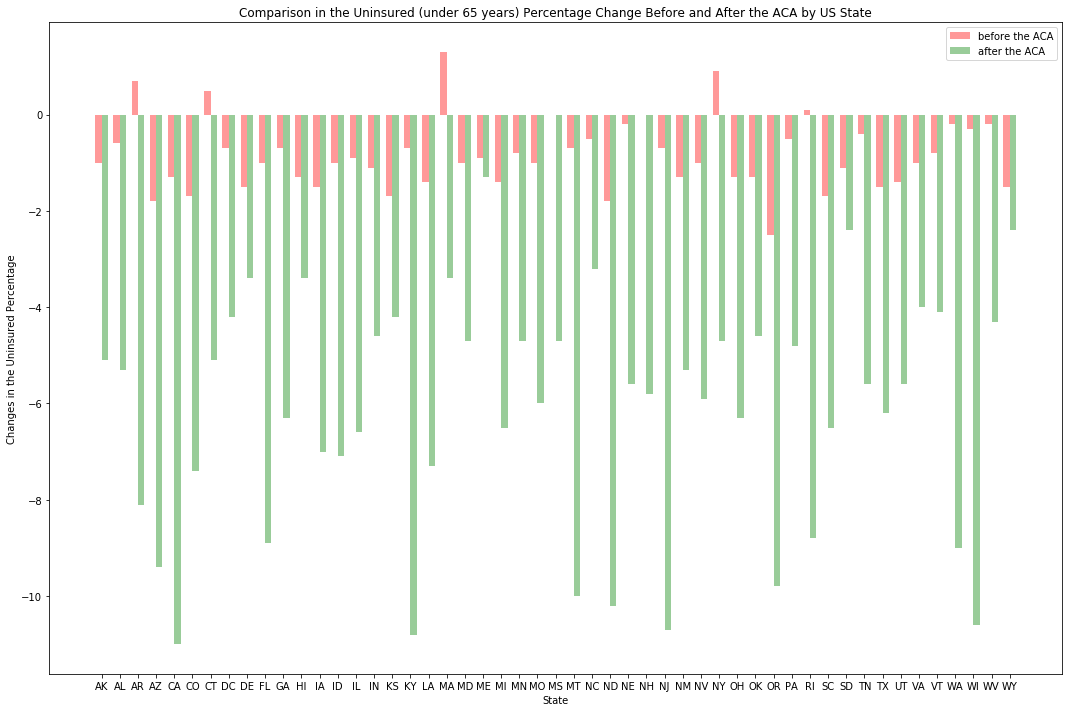

In [2]:
#--------------------------------------------
# Bargraph (side-by-side) to compare the change percentage between before and after the ACA.
# ref: https://matplotlib.org/gallery/statistics/barchart_demo.html.
#--------------------------------------------

fig,ax = plt.subplots(figsize=(15,10))

index = np.arange(51)

opacity = 0.4
bar_width = 0.35

ax.bar(index,df_Uninsured["2010-13"],bar_width,
       alpha=opacity, color='r',
       label="before the ACA")

ax.bar(index+bar_width,
       df_Uninsured["2013-16"],bar_width,
       alpha=opacity, color='g',
       label="after the ACA")

ax.set_xlabel("State")
ax.set_xticks(index+bar_width/2)
ax.set_ylabel("Changes in the Uninsured Percentage")
ax.set_title("Comparison in the Uninsured (under 65 years) Percentage Change Before and After the ACA by US State" )
ax.set_xticklabels(state_codes)
ax.legend()   # to show the bar labels
fig.tight_layout()  # make subplots fit within the figure
plt.show()


The data is also visualized [using Tableau Public](https://public.tableau.com/profile/bo.suzow#!/vizhome/ACAImpact/ACAImpact). 

In [2]:
%%HTML
<div class='tableauPlaceholder' id='viz1526325603583' style='position: relative'><noscript><a href='https:&#47;&#47;github.com&#47;bsuzow&#47;USUninsured&#47;blob&#47;master&#47;ACA_Effect_on_the_Uninsured.md'><img alt='The ACA Impact on the Uninsured Decrease Rate ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;AC&#47;ACAImpact&#47;ACAImpact&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ACAImpact&#47;ACAImpact' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;AC&#47;ACAImpact&#47;ACAImpact&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1526325603583');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>